## **Import Important Libraries**

In [1]:
import os
import numpy as np #for linear algebra

#read the data path
import pathlib

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to use tensorflow and keras for the sequential model
import tensorflow as tf
import keras
from tensorflow.keras import Sequential

#for images
import imageio
import matplotlib.image as img

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Read the images data**

In [4]:
#read path
data_path = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

In [5]:
#return files/ folders
arborio = list(data_path.glob('Arborio/*'))[:1000]
basmati = list(data_path.glob('Basmati/*'))[:1000]
ipsala = list(data_path.glob('Ipsala/*'))[:1000]
jasmine = list(data_path.glob('Jasmine/*'))[:1000]
karacadag = list(data_path.glob('Karacadag/*'))[:1000]

## **Make the Data Labels**

In [6]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala': ipsala,
    'jasmine' :jasmine,
    'karacadag' : karacadag,
}

In [7]:
rice_labels = {
    0: 'Arborio',
    1: 'Basmati',
    2: 'Ipsala',
    3: 'Jasmine',
    4: 'Karacadag'
}

## **Data visualization and Plotting**

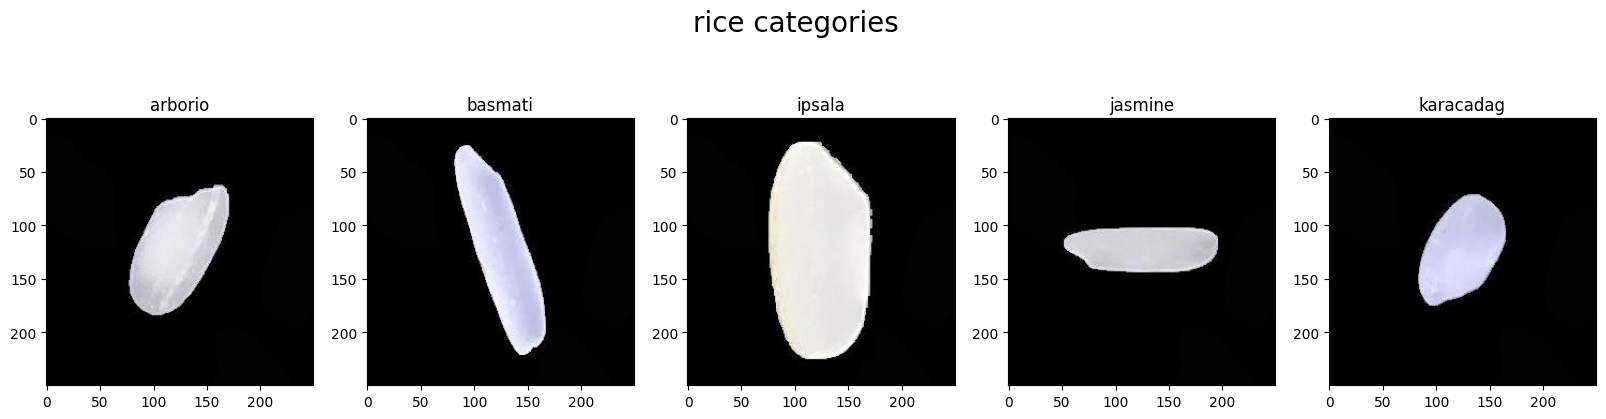

In [8]:
#define the plot properties
fig, ax = plt.subplots(ncols = 5, figsize = (20,5))
fig.suptitle("rice categories", fontsize = 20)

#read one image from every category
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)

#show the images
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

## **Apply Data Augmentation using ImageDataGenerator**

In [9]:
#define the ImageDataGenerator to rescale the images 
train_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)


#apply data augmentation on the training data with size 224 * 224
train_data = train_gen.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset', 
                                           target_size = (224,224), 
                                           batch_size = 32,
                                           class_mode = 'categorical',
                                           shuffle = True, 
                                           subset = 'training')

#apply data augmentation on the testing data with size 224 * 224
test_data = train_gen.flow_from_directory('/kaggle/input/rice-image-dataset/Rice_Image_Dataset', 
                                           target_size = (224,224), 
                                           batch_size = 1,
                                           class_mode = 'categorical',
                                           shuffle = True, 
                                           subset = 'validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## **Multi Layer Perceptron Model Building**

In [10]:
#model
model = Sequential()
#input layer
model.add(tf.keras.layers.Flatten())

#hidden layers with relu activation
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))

#output layer with sigmoid activation and 5 classes
model.add(tf.keras.layers.Dense(5, activation = tf.keras.activations.sigmoid))

In [11]:
#define callback to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

## **Complie and fit MLP model**

In [12]:
#compile the model with adam optimizer 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#fit the model with 10 epochs and callback 
model.fit(train_data, validation_data = test_data, 
          epochs = 10, callbacks=early_stopping)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732476228.580643     129 service.cc:145] XLA service 0x787754003680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732476228.580712     129 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 2:44:11 5s/step - accuracy: 0.2188 - loss: 1.6652

I0000 00:00:1732476230.015220     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 608s 322ms/step - accuracy: 0.8053 - loss: 0.3607 - val_accuracy: 0.8529 - val_loss: 0.1225
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 159s 85ms/step - accuracy: 0.9199 - loss: 0.1095 - val_accuracy: 0.8873 - val_loss: 0.0851
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 86ms/step - accuracy: 0.9282 - loss: 0.0835 - val_accuracy: 0.9679 - val_loss: 0.1018
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.9567 - loss: 0.0734 - val_accuracy: 0.9586 - val_loss: 0.0985
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 158s 84ms/step - accuracy: 0.9621 - loss: 0.0653 - val_accuracy: 0.9751 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 162s 86ms/step - accuracy: 0.9787 - loss: 0.0572 - val_accuracy: 0.9851 - val_loss: 0.0490
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 87ms/step - accuracy: 0.9816 - loss: 0.0516 - val_accuracy: 0.9797 - val_loss: 0.0830
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 158s 84ms/step - accuracy: 0.9847 - l

## **MLP Model Prediction**

In [14]:
#model prediction
y_pred = model.predict(test_data)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step


In [16]:
#print the model prediction values
y_pred

array([[6.6590346e-02, 3.5286088e-02, 9.9817562e-01, 9.9857795e-01,
        3.6165269e-09],
       [5.6482351e-01, 2.5220882e-06, 9.9999762e-01, 4.9152333e-01,
        2.5884075e-10],
       [6.6082662e-01, 9.4376804e-07, 9.9999952e-01, 6.4342600e-01,
        6.8873449e-11],
       ...,
       [2.8465318e-21, 9.9991083e-01, 5.7577272e-09, 5.2972126e-05,
        5.2579915e-28],
       [2.0973424e-03, 9.9839169e-01, 1.6720979e-02, 9.0987468e-01,
        3.0029400e-06],
       [4.1086832e-01, 1.1462382e-05, 9.9999654e-01, 9.0235794e-01,
        8.1062407e-11]], dtype=float32)

In [17]:
#take the argmax for the predicted value
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([3, 2, 2, ..., 1, 1, 2])

## **Model Evaluation**

In [18]:
#evaluate the model on training data
train_score = model.evaluate(train_data, verbose = 1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.9878 - loss: 0.0367


In [19]:
#evaluate the model on testing data
test_score = model.evaluate(test_data, verbose = 1)

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9826 - loss: 0.0493
